In [ ]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/ProjectData/FaceRecognition/

/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition


In [ ]:
face_path = '/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition/dataset2/'
pickle_path = '/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition/pickle/aug/'
drive_path_checkpoint = '/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition/pickle/checkpoint/face_VGG16_2.hdf5'
VM_path = '/content'
VM_face_path = '/content/dataset2'
VM_face_aug_path = '/content/dataset'

In [ ]:
!cp -r '{face_path}' '{VM_path}'

In [ ]:
%cd /content
!mkdir dataset

/content


In [ ]:
!rm -r /content/dataset/*

rm: cannot remove '/content/dataset/*': No such file or directory


In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
face_dec = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
def getFace_haar(image):
  max = -1
  x1 = 0
  x2=0
  y1=0
  y2 = 0
  faces = face_dec.detectMultiScale(image, 1.3,5)
  for (x,y,w,h) in faces:
    #print(w,h)
    if w < 20 or h <20:
      continue
    area = h*w
    if max < area:
      max = area
      x1 = x
      y1 = y
      x2 = x+w
      y2 = y+h

    return x1, x2, y1, y2
    

In [ ]:
#knownface = []
count = 0
k = 1
facelabels = os.listdir(VM_face_path)
for f in facelabels:
  sorc = VM_face_path+'/'+f
  dest = VM_face_aug_path+'/'+f
  os.mkdir(dest)
  img_list = os.listdir(sorc)
  print('Processing ',f, str(k), 'out of ', str(len(facelabels)), 'classes')
  k += 1
  for img in img_list:
    imgPath = sorc+'/'+img
    image = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    faces = face_dec.detectMultiScale(image)

    cord = getFace_haar(image)
    if cord == None:
      continue
    x1,x2, y1, y2 = cord
    face = image[y1:y2, x1:x2]
    
    savepath = dest+'/'+str(count)+'.png'
    count += 1
    '''
    if count >= 5:
      break
    '''
    cv2.imwrite(savepath, face)
  '''
  if count >= 5:
      break
  '''

Processing  Aftab_Shivdasani 1 out of  20 classes
Processing  Hrithik_Roshan 2 out of  20 classes
Processing  Aamir_Khan 3 out of  20 classes
Processing  Amitabh_Bachchan 4 out of  20 classes
Processing  Ayushmann_Khurrana 5 out of  20 classes
Processing  Anushka_Sharma 6 out of  20 classes
Processing  Bhumi_Pednekar 7 out of  20 classes
Processing  Anil_Kapoor 8 out of  20 classes
Processing  Abhishek_Bachchan 9 out of  20 classes
Processing  Deepika_Padukone 10 out of  20 classes
Processing  Farhan_Akhtar 11 out of  20 classes
Processing  Emraan_Hashmi 12 out of  20 classes
Processing  Aishwarya_Rai 13 out of  20 classes
Processing  Alia_Bhatt 14 out of  20 classes
Processing  Disha_Patani 15 out of  20 classes
Processing  Akshay_Kumar 16 out of  20 classes
Processing  Ajay_Devgn 17 out of  20 classes
Processing  Ileana_D_Cruz 18 out of  20 classes
Processing  Arshad_Warsi 19 out of  20 classes
Processing  Abhay_Deol 20 out of  20 classes


In [ ]:
!ls -la /content/dataset

total 88
drwxr-xr-x 22 root root 4096 Apr 27 20:42 .
drwxr-xr-x  1 root root 4096 Apr 27 20:24 ..
drwxr-xr-x  2 root root 4096 Apr 27 20:26 Aamir_Khan
drwxr-xr-x  2 root root 4096 Apr 27 20:43 Abhay_Deol
drwxr-xr-x  2 root root 4096 Apr 27 20:31 Abhishek_Bachchan
drwxr-xr-x  2 root root 4096 Apr 27 20:25 Aftab_Shivdasani
drwxr-xr-x  2 root root 4096 Apr 27 20:36 Aishwarya_Rai
drwxr-xr-x  2 root root 4096 Apr 27 20:40 Ajay_Devgn
drwxr-xr-x  2 root root 4096 Apr 27 20:40 Akshay_Kumar
drwxr-xr-x  2 root root 4096 Apr 27 20:37 Alia_Bhatt
drwxr-xr-x  2 root root 4096 Apr 27 20:27 Amitabh_Bachchan
drwxr-xr-x  2 root root 4096 Apr 27 20:31 Anil_Kapoor
drwxr-xr-x  2 root root 4096 Apr 27 20:29 Anushka_Sharma
drwxr-xr-x  2 root root 4096 Apr 27 20:42 Arshad_Warsi
drwxr-xr-x  2 root root 4096 Apr 27 20:28 Ayushmann_Khurrana
drwxr-xr-x  2 root root 4096 Apr 27 20:30 Bhumi_Pednekar
drwxr-xr-x  2 root root 4096 Apr 27 20:33 Deepika_Padukone
drwxr-xr-x  2 root root 4096 Apr 27 20:39 Disha_Patani
drw

In [ ]:
!rm -r /content/dataset/.ipynb_checkpoints

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = VM_face_aug_path

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob(train_path+'/*')
  

  

In [ ]:
for l in vgg.layers[-1:]:
  l.trainable = True
vgg.summary()
for l in vgg.layers:
  print(l, l.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dense(512,activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


checkpoint_filepath = drive_path_checkpoint
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True, save_freq='epoch')

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy','precision']
)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range = 20,
                                   brightness_range = [0.5,1.5],
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical', 
                                                 subset='training')

testing_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical', 
                                                 subset='validation')




Found 1672 images belonging to 20 classes.
Found 408 images belonging to 20 classes.


In [ ]:
training_set.class_indices

{'Aamir_Khan': 0,
 'Abhay_Deol': 1,
 'Abhishek_Bachchan': 2,
 'Aftab_Shivdasani': 3,
 'Aishwarya_Rai': 4,
 'Ajay_Devgn': 5,
 'Akshay_Kumar': 6,
 'Alia_Bhatt': 7,
 'Amitabh_Bachchan': 8,
 'Anil_Kapoor': 9,
 'Anushka_Sharma': 10,
 'Arshad_Warsi': 11,
 'Ayushmann_Khurrana': 12,
 'Bhumi_Pednekar': 13,
 'Deepika_Padukone': 14,
 'Disha_Patani': 15,
 'Emraan_Hashmi': 16,
 'Farhan_Akhtar': 17,
 'Hrithik_Roshan': 18,
 'Ileana_D_Cruz': 19}

In [ ]:
r = model.fit(
  training_set,
  validation_data=testing_set,
  epochs=64,
  callbacks = [model_checkpoint]
)

Epoch 1/64
53/53 [==============================] - 30s 551ms/step - loss: 3.7732 - accuracy: 0.1087 - val_loss: 2.2292 - val_accuracy: 0.2672
Epoch 2/64
53/53 [==============================] - 29s 543ms/step - loss: 2.1103 - accuracy: 0.3184 - val_loss: 2.0504 - val_accuracy: 0.3235
Epoch 3/64
53/53 [==============================] - 29s 543ms/step - loss: 1.7438 - accuracy: 0.4417 - val_loss: 1.6252 - val_accuracy: 0.4877
Epoch 4/64
53/53 [==============================] - 29s 546ms/step - loss: 1.5147 - accuracy: 0.5182 - val_loss: 1.5630 - val_accuracy: 0.5539
Epoch 5/64
53/53 [==============================] - 30s 566ms/step - loss: 1.2219 - accuracy: 0.6170 - val_loss: 1.4030 - val_accuracy: 0.5735
Epoch 6/64
53/53 [==============================] - 30s 558ms/step - loss: 1.0529 - accuracy: 0.6511 - val_loss: 1.2856 - val_accuracy: 0.6078
Epoch 7/64
53/53 [==============================] - 29s 552ms/step - loss: 0.8799 - accuracy: 0.7227 - val_loss: 1.4259 - val_accuracy: 0.5711

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition/pickle/transferVGG16_2_celeb_dataset.h5'
model.save(model_path)

In [ ]:
NB_EPOCHS = 64
m = []
for i in range(NB_EPOCHS):
  m.append(i)

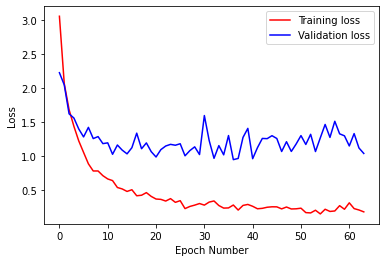

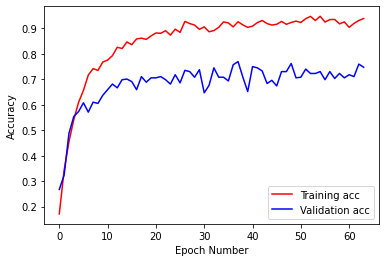

In [ ]:

loss_trace = r.history['loss']
val_loss_trace = r.history['val_loss']
plt.plot(m,loss_trace, c='r')
plt.plot(m,val_loss_trace, c='b')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()


accuracy_trace = r.history['accuracy']
val_accuracy_trace = r.history['val_accuracy']
plt.plot(m,accuracy_trace, c='r')
plt.plot(m,val_accuracy_trace, c='b')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'Validation acc'], loc='lower right')
plt.show()
